<a href="https://colab.research.google.com/github/EnFiore/Master-AI/blob/main/analisi_disastri_aerei.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt


## ANALISI DEGLI INCIDENTI AEREI
A partire dai dati sugli incidenti aerei  che vanno dal 1919 al 2023 si effettueranno una serie di analisi sui dati. E si riponderà ad lacune domande, quali:

1. individuare i primi 10 paesi con più incidenti
2. qual è il giorno della settimana con più incidenti
3. trovare gli operatori più sicuri
4. indicare e rappresentare i modelli di aereo più sicuri

In [ ]:
air_dis = pd.read_csv("https://proai-datasets.s3.eu-west-3.amazonaws.com/aviation-accidents.csv")

In [ ]:
df_country = air_dis['country'].value_counts()
print('La nazione con il maggior numero di incidenti è: ' + air_dis['country'].value_counts().idxmax() + '\ncon un numero di incidenti, pari a: '
      + str(air_dis['country'].value_counts().max()))

la nazione con il maggior numero di incidenti è: USA
con un numero di incidenti, pari a: 4377


### I PRIMI 10 PAESI CON PIU' INCIDENTI

<Axes: title={'center': 'Primi 10 Paesi con più incidenti'}, xlabel='country', ylabel='accidents'>

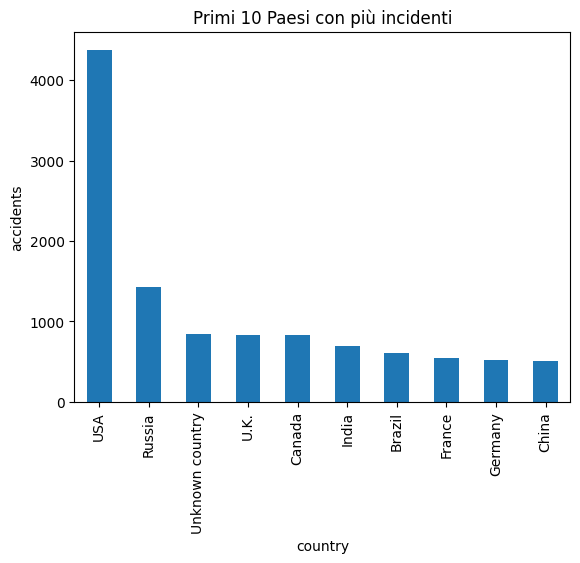

In [ ]:
df_country[:10].plot(kind = 'bar', title="Primi 10 Paesi con più incidenti",xlabel='country', ylabel = 'accidents')

## IN QUALE GIORNO DELLA SETTIMANA AVVENGONO PIU' INCIDENTI?

In [ ]:
#normalizzazione delle date, eliminazione righe con date aventi formato non valido
air_dis_date_mask = air_dis['date'] != 'date unk.'

In [ ]:
air_dis_date = air_dis[air_dis_date_mask]

In [ ]:
#normalizzazione delle date, eliminando evenutali righe con caratteri strani
filter = air_dis_date['date'].str.contains("\?")
air_dis_date= air_dis_date[~filter]
filter = air_dis_date['date'].str.contains("14-14")
air_dis_date= air_dis_date[~filter]

In [ ]:
air_dis_date['date'] = pd.to_datetime(air_dis_date['date']) #conversione nel formato data

<ipython-input-9-b214a0b3c7cf>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  air_dis_date['date'] = pd.to_datetime(air_dis_date['date']) #conversione nel formato data


In [ ]:
air_dis_date['day_n']= air_dis_date['date'].dt.day_name() # valorizzazione giorni settiamna

In [ ]:
print('Il giorno con più incidenti è: '+ air_dis_date['day_n'].value_counts().idxmax())

Il giorno con più incidenti è: Friday


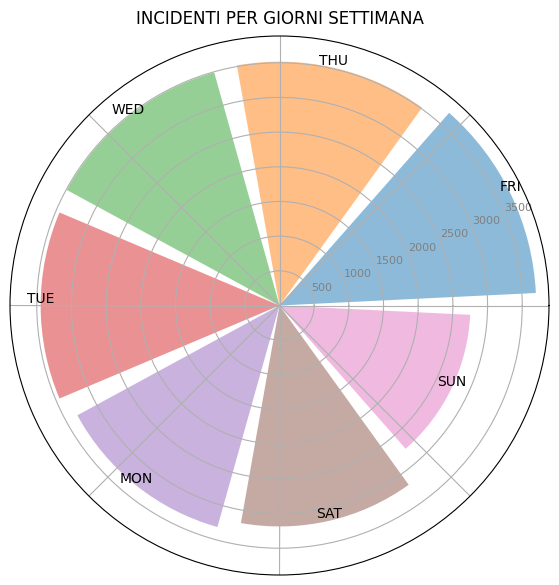

In [ ]:
# Dati per il grafico polare
day = ['Fri','Thu','Wed','Tue','Mon','Sat','Sun']
theta = np.linspace(0, 2*np.pi, len(day), endpoint=False)
offset = np.pi / len(day)
r = air_dis_date['day_n'].value_counts().values

# Creazione del grafico polare
plt.figure(figsize=(7, 7))
ax = plt.subplot(111, projection='polar')
width = np.deg2rad(360) / len(day)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']
bars = ax.bar(theta + offset, r,color=colors, alpha=0.5, bottom=0.0)
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.annotate(f'{day[i].upper()}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 0), textcoords='offset points',
                ha='center', va='bottom')

# Personalizzazione del grafico
ax.set_title("INCIDENTI PER GIORNI SETTIMANA", va='bottom')
ax.grid(True)
ax.set_xticklabels([])
ax.tick_params(axis='y', labelsize=8, labelcolor = 'gray')

# Visualizzazione del grafico
plt.show()

## QUALI SONO GLI OPERATORI PIU' SICURI?

In [ ]:
operator_mask = air_dis['operator'].value_counts() == 1

In [ ]:
operator_df = air_dis['operator'].value_counts()

In [ ]:
print('i migliori operatori sono:\n')
best_operator = operator_df[operator_mask]
print(best_operator)

i migliori operatori sono:

operator
EHR Aviation                   1
Hasit TrockenmÃ¶rtel           1
ART 21631                      1
Suncoast Aviation              1
Tri-state Executive Air        1
                              ..
BAFIN                          1
Dow Chemical Company           1
Aero Bellavista                1
Pacific Missionary Aviation    1
Bar Aviation                   1
Name: count, Length: 4063, dtype: int64


## QUALE MODELLO DI AEREO HA AVUTO PIU' INCIDENTI?

In [ ]:
print('il modello di aereo con più incidenti è il '+ air_dis.value_counts('type').idxmax() + ' con un mnumero di incidenti pari a: '+
str(air_dis.value_counts('type').max()))

il modello di aereo con più incidenti è il Douglas C-47A (DC-3) con un mnumero di incidenti pari a: 1916


RAPPRESENTAZIONE GRAFICA DEI 10 MODELLI CON PIU' INCIDENTI

<Axes: title={'center': 'Primi 10 Modelli di aereo con più incidenti'}, xlabel='Modello', ylabel='Incidenti'>

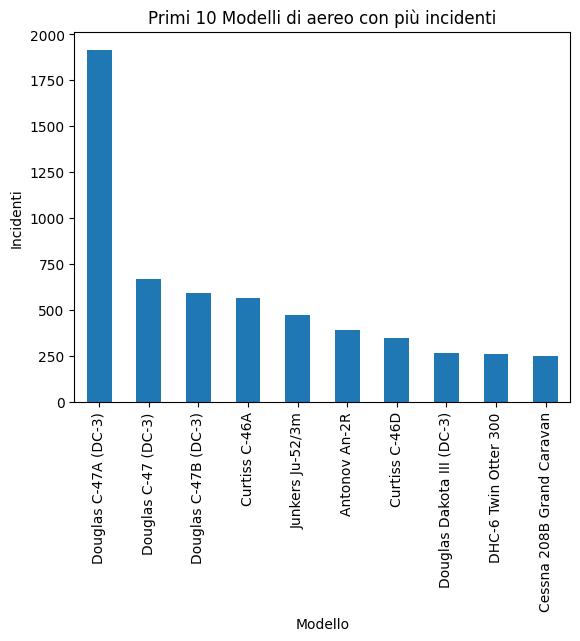

In [ ]:
type10= air_dis.value_counts('type')[:10]
type10.plot(kind = 'bar', title="Primi 10 Modelli di aereo con più incidenti",xlabel='Modello', ylabel = 'Incidenti')

## QUALI SONO I MODELLI DI AEREO CHE HANNO CAUSATO PIU' MORTI?

In [ ]:
air_fatalities = air_dis[['type','fatalities','country']]

In [ ]:
air_fatalities= air_fatalities.dropna(subset=["fatalities"])

In [ ]:
air_fatalities['fatalities']= air_fatalities['fatalities'].apply(lambda x: pd.to_numeric(x,errors='coerce'))

In [ ]:
air_fatalities_group = air_fatalities.drop('country', axis=1).groupby('type')

In [ ]:
#air_fatalities_group.drop('location', axies=1)
type_10_fatalities = air_fatalities_group.sum().sort_values('fatalities', ascending = False).head(10)
print(f"I primi 10 modelli di aereo che hanno causato più morti sono:\n{type_10_fatalities}")

I primi 10 modelli di aereo che hanno causato più morti sono:
                          fatalities
type                                
Douglas C-47A (DC-3)          5689.0
Douglas C-47 (DC-3)           2619.0
Douglas C-47B (DC-3)          1994.0
Tupolev Tu-154M               1395.0
Ilyushin Il-18V               1356.0
DC-9-32                       1207.0
Lockheed C-130H Hercules      1192.0
Antonov An-26                 1163.0
Junkers Ju-52/3m              1114.0
Douglas DC-6B                 1040.0


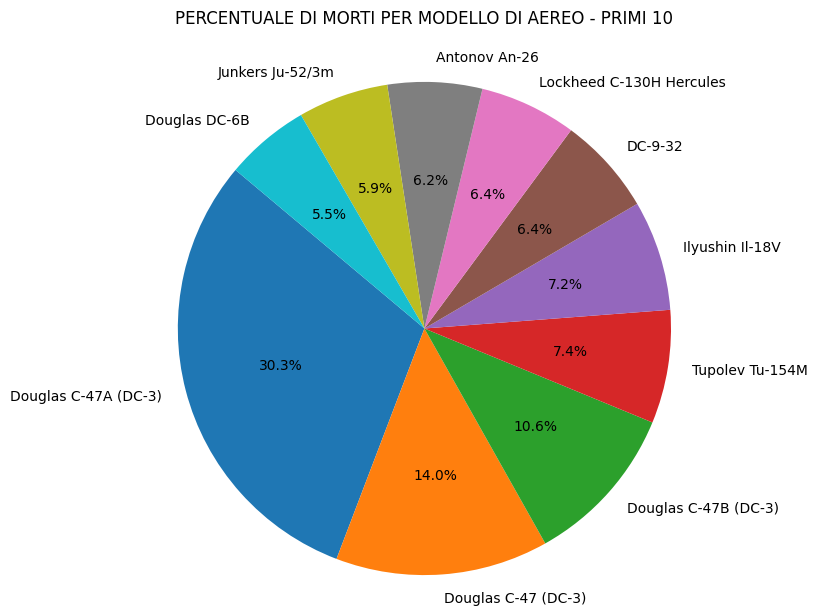

In [ ]:
plt.figure(figsize=(7, 7))
plt.pie(type_10_fatalities['fatalities'], labels=type_10_fatalities.index, autopct='%1.1f%%', startangle=140)

# Aggiungi un titolo
plt.title('PERCENTUALE DI MORTI PER MODELLO DI AEREO - PRIMI 10', y=1.05)


# Mostra il grafico
plt.axis('equal')  # Assicura che il grafico sia un cerchio invece di un'ellisse
plt.show()

## RAPPRESENTAZIONE CARTOGRAFICA INCIDENTI AEREI

In [ ]:
states_shp = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

<ipython-input-71-ca89769f5457>:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  states_shp = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [ ]:
air_state_fatalities_group = air_fatalities.drop('type', axis=1).groupby('country')

In [ ]:
#air_fatalities.loc[air_fatalities['country'].str.contains('Trinidad') ]

In [ ]:
#states_shp.loc[states_shp['name'].str.contains('Somaliland') ]


In [ ]:
# normalizzazione nomi stati
states_shp['name'] = states_shp['name'].replace(['United States of America'], 'USA')
states_shp['name'] = states_shp['name'].replace(['United Republic of Tanzania'], 'Tanzania')
states_shp['name'] = states_shp['name'].replace(['Papua New Guinea'], 'P.N. Guinea')
states_shp['name'] = states_shp['name'].replace(['Dem. Rep. Congo'], 'D.R. Congo')
states_shp['name'] = states_shp['name'].replace(['Dominican Republic'], 'Dominican Rep.')
states_shp['name'] = states_shp['name'].replace(['United Kingdom'], 'U.K.')
states_shp['name'] = states_shp['name'].replace(['The Bahamas'], 'Bahamas')
states_shp['name'] = states_shp['name'].replace(['Timor-Leste'], 'Timor')
states_shp['name'] = states_shp['name'].replace(['Côte d\'Ivoire'], 'Cote d\'Ivoire')
states_shp['name'] = states_shp['name'].replace(['Central African Rep.'], 'C.A.R.')
states_shp['name'] = states_shp['name'].replace(['Republic of the Congo'], 'Congo')
states_shp['name'] = states_shp['name'].replace(['Equatorial Guinea'], 'Eq. Guinea')
states_shp['name'] = states_shp['name'].replace(['eSwatini'], 'Eswatini')
states_shp['name'] = states_shp['name'].replace(['United Arab Emirates'], 'Saudi Arabia')
states_shp['name'] = states_shp['name'].replace(['Solomon Is.'], 'Solomon Isl.')
states_shp['name'] = states_shp['name'].replace(['Czechia'], 'Czech Rep.')
states_shp['name'] = states_shp['name'].replace(['Northern Cyprus'], 'Cyprus')
states_shp['name'] = states_shp['name'].replace(['Bosnia and Herz.'], 'Bosnia')
states_shp['name'] = states_shp['name'].replace(['Republic of Serbia'], 'Serbia')
states_shp['name'] = states_shp['name'].replace(['Northern Cyprus'], 'N. Cyprus')
states_shp['name'] = states_shp['name'].replace(['S. Sudan'], 'South Sudan')
states_shp['name'] = states_shp['name'].replace(['Palestine'], 'Palestine')
states_shp['name'] = states_shp['name'].replace(['W. Sahara'], 'Western Sahara')
states_shp['name'] = states_shp['name'].replace(['Falkland Is.'], 'Falkland Isl.')
states_shp['name'] = states_shp['name'].replace(['Trinidad and Tobago'], 'Trinidad & Tobago')

In [ ]:
#states_shp.loc[states_shp['name'].str.contains('Falkland') ]

In [ ]:
# join tabella shape file con tabella dati attraverso il nome dello stato
air_dis_states_shp = states_shp.merge(air_state_fatalities_group.sum(), how='left', left_on='name', right_on = 'country')

In [ ]:
#utile anche come check nomi stati non corretti. Selezione righe che hanno valore nan per il campo fatalities nel shp
fatalities_shp_nan = air_dis_states_shp.loc[air_dis_states_shp['fatalities'].isna()]
print(f"Stati di cui non si hanno dati:\n{fatalities_shp_nan['name']}")

Stati di cui non si hanno dati:
23     Fr. S. Antarctic Lands
79                  Palestine
149                    Brunei
160                 N. Cyprus
167                Somaliland
Name: name, dtype: object


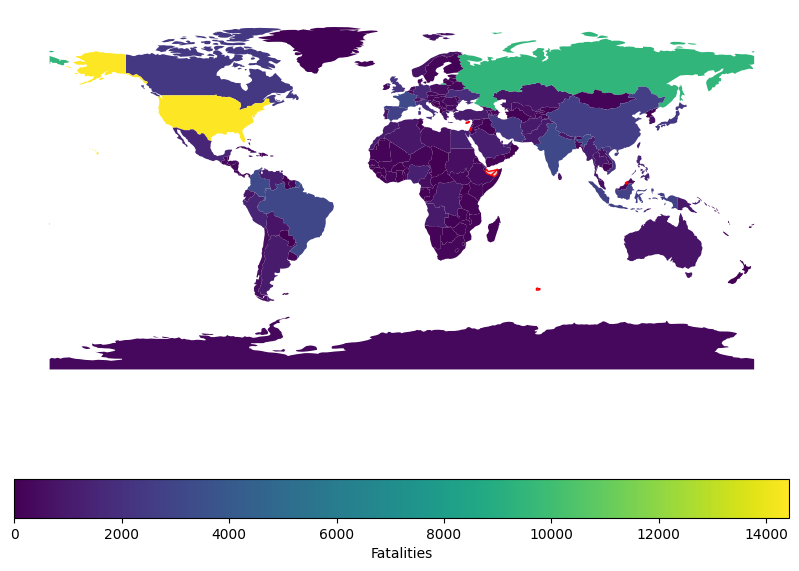

In [ ]:
air_dis_states_shp.plot(column="fatalities",
                        figsize=(10, 8),
                        legend=True,
                       legend_kwds={"label": "Fatalities", "orientation": "horizontal"},
                       missing_kwds={"color": "lightgrey", "edgecolor": "red", "hatch": "///", "label": "Missing values",}
                       ).set_axis_off()